# Data Cleaning

# 1. Introduction and Preparation

Data cleaning, also known as data cleansing or data scrubbing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It is an essential step in data preprocessing and analysis to ensure that the data is accurate, reliable, and suitable for further analysis or modeling.

Data cleaning is important because real-world data is often imperfect. It can contain various issues such as missing values, duplicate records, incorrect formatting, inconsistent spellings, outliers, and more. These problems can arise due to human errors during data entry, technical glitches, or the integration of data from different sources.

The primary objectives of data cleaning are as follows:

1. **Removing or correcting errors:** Data cleaning involves identifying and addressing errors in the dataset. For example, it may involve fixing typos, resolving inconsistent date formats, or rectifying inaccurate numerical entries.


2. **Handling missing data:** Missing data refers to the absence of values in certain records or attributes. Data cleaning techniques help in dealing with missing data, which may involve imputing missing values based on statistical methods or removing records with excessive missing data.


3. **Handling duplicates:** Duplicates are identical or near-identical records that exist within a dataset. Data cleaning aims to identify and remove or merge duplicate records, ensuring that each unique entity is represented only once.


4. **Standardizing and transforming data:** Inconsistent formatting, units, or scales can hinder data analysis. Data cleaning involves standardizing variables, converting units, and transforming data to ensure consistency and compatibility across the dataset.


5. **Handling outliers:** Outliers are extreme values that deviate significantly from the typical pattern of the data. Data cleaning techniques help in identifying and dealing with outliers, which may involve removing them if they are due to data entry errors or handling them separately if they represent important observations.


6. **Ensuring data integrity:** Data cleaning plays a vital role in maintaining the integrity of the dataset. By addressing errors and inconsistencies, it helps ensure that the data accurately represents the real-world phenomena or entities it is intended to describe.

Data cleaning is typically performed using a combination of manual and automated techniques. It requires domain knowledge, data exploration, and the use of various data cleaning tools and algorithms.

By performing effective data cleaning, analysts and data scientists can improve the quality of the data and enhance the accuracy and reliability of their subsequent analyses, predictive models, or decision-making processes.

In [3]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
!git clone https://github.com/MLcmore2023/MLcmore2023.git

In [ ]:
!mv ./MLcmore2023/'Section 3 Data Cleaning & Data Encoding'/* ./MLcmore2023/'Section 3 Data Cleaning & Data Encoding'/.* ./

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


# 2. Data Cleaning

## 2.1 Removing or correcting errors

1. **Removing or correcting errors:** Data cleaning involves identifying and addressing errors in the dataset. For example, it may involve fixing typos, resolving inconsistent date formats, or rectifying inaccurate numerical entries.

Correcting errors in the "sex" column of a dataset

df['column_name'] = df['column_name'].str.replace('incorrect_value', 'correct_value')

### Example

Changing "errors" in the "sex" column:

In [6]:
df.sex[0:5]

0    female
1      male
2    female
3    female
4      male
Name: sex, dtype: object

In [7]:
# male -> M
# female -> F
df['sex'].replace('male', 'M', inplace=True)
df['sex'].replace('female', 'F', inplace=True)

In [8]:
df.sex[0:5]

0    F
1    M
2    F
3    F
4    M
Name: sex, dtype: object

## 2.2 Handling missing data

2. **Handling missing data:** Missing data refers to the absence of values in certain records or attributes. Data cleaning techniques help in dealing with missing data, which may involve imputing missing values based on statistical methods or removing records with excessive missing data.

The first step is always to check missing values.

In [9]:
print(df.isnull().sum())

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64


To fix missing data in a column, you can use various techniques depending on the nature of the missing values. Here are a few common approaches:

## 1. Removing missing values:

- If the missing values are relatively few and randomly distributed, you may choose to remove the rows or columns with missing values.
- Use the **dropna()** method in pandas to drop rows or columns with missing values. For example: **df.dropna().**

### Example
drop the row with nan value in “embarked” column:

In [10]:
df.dropna(subset=['embarked'], inplace=True)

In [11]:
# Now, the row with missing value in embarked column has been dropped
print(df.isnull().sum())

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          0
boat            542
body            776
home.dest       385
survived          0
dtype: int64


## 2. Imputing missing values:

- If the missing values follow a certain pattern or have a relationship with other variables, you can fill them in with estimated or imputed values.
- Use the **fillna()** method in pandas to fill missing values with a specific value, mean, median, or any other desired imputation method. For example: **df['column_name'].fillna(value)**.

### Example
Filling missing values with median age in "age" column:


In [12]:
m = df['age'].median()
m

28.0

In [13]:
df['age'] = df['age'].replace(np.nan, m)

In [14]:
print(df.isnull().sum())

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          0
boat            542
body            776
home.dest       385
survived          0
dtype: int64


There are also some different ways to deal with missing values. For example, If you determine that the column is not relevant or does not contribute significantly to your analysis, you can directly drop the entire column.

## 2.3 Handling duplicates

3. **Handling duplicates:** Duplicates are identical or near-identical records that exist within a dataset. Data cleaning aims to identify and remove or merge duplicate records, ensuring that each unique entity is represented only once.

In [15]:
# Since the original dataset does not contain any duplicates,
# for educational purposes, I manually added some duplicates.

# Select the row(s) to duplicate
row_to_duplicate = df.loc[0]

# Append the row(s) to create duplicates
df = df.append([row_to_duplicate, row_to_duplicate], ignore_index=True)

### Example
Remove the deplicated which I created.

In [16]:
# Find duplicates in the DataFrame
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
849,1216,3,"Smyth, Miss. Julia",F,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
850,1216,3,"Smyth, Miss. Julia",F,28.0,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1


In [17]:
# remove all the duplicates
df.drop_duplicates(inplace=True)

In [18]:
# Now, the duplicates are gone
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived


## 2.4 Standardizing and transforming data

4. **Standardizing and transforming data:** Inconsistent formatting, units, or scales can hinder data analysis. Data cleaning involves standardizing variables, converting units, and transforming data to ensure consistency and compatibility across the dataset.

### Standardizing Example
Converting "embarked" column to lowercase


In [19]:
df.embarked[0:5]

0    Q
1    S
2    S
3    S
4    S
Name: embarked, dtype: object

In [20]:
df['embarked'] = df['embarked'].str.lower()
df.embarked[0:5]

0    q
1    s
2    s
3    s
4    s
Name: embarked, dtype: object

### Transforming Example
Scaling numeric values between 0 and 1 using Min-Max scaling


In [21]:
df.age[0:5]

0    28.0
1    38.0
2    30.0
3    54.0
4    40.0
Name: age, dtype: float64

In [22]:
# Scaling numeric values between 0 and 1 using Min-Max scaling
df['age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())

In [23]:
df.age[0:5]

0    0.348643
1    0.473904
2    0.373695
3    0.674321
4    0.498956
Name: age, dtype: float64

## 2.5 Handling Outliers

5. **Handling outliers:** Outliers are extreme values that deviate significantly from the typical pattern of the data. Data cleaning techniques help in identifying and dealing with outliers, which may involve removing them if they are due to data entry errors or handling them separately if they represent important observations.

### Example

There is one outlier with person that survived with an overwhelming fare that is around 500.


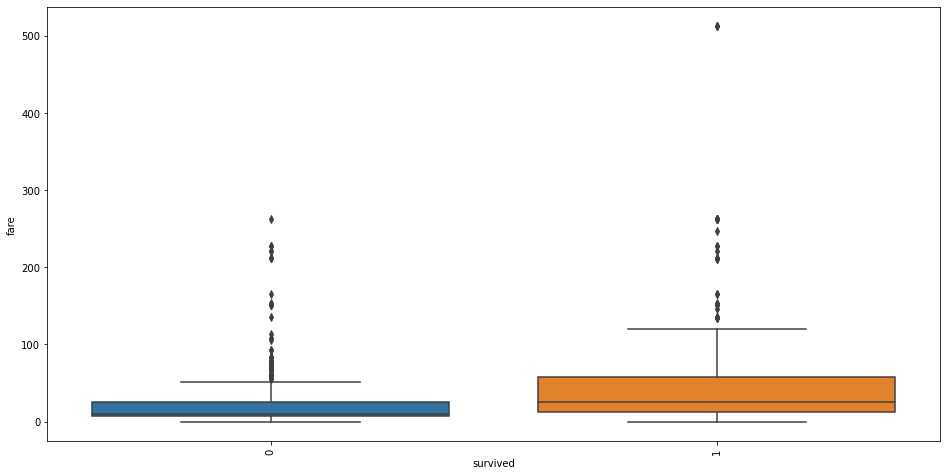

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.concat([df['survived'], df['fare']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=df['survived'], y=df['fare'], data=data)
plt.xticks(rotation=90);

In [25]:
df[df['fare'] > 500]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
60,50,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",F,0.724426,0,1,PC 17755,512.3292,B51 B53 B55,c,3,NaN,"Germantown, Philadelphia, PA",1
789,183,1,"Lesurer, Mr. Gustave J",M,0.436325,0,0,PC 17755,512.3292,B101,c,3,NaN,NaN,1
795,49,1,"Cardeza, Mr. Thomas Drake Martinez",M,0.448852,0,1,PC 17755,512.3292,B51 B53 B55,c,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",1


In [26]:
# fix the outlier
df["fare"].replace({ 512.3292 : 7.25}, inplace=True)
df = df[(df.passenger_id != 259) & (df.passenger_id != 680) & (df.passenger_id != 738)]

## 2.6 Exercise

In [27]:
print(df.isnull().sum())

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          0
boat            542
body            776
home.dest       385
survived          0
dtype: int64


As we can see from the table above, there are still some missing values remaining in the dataframe, so now it is your turn do finish the final touch of the data cleaning! Good luck!

In [28]:
# fare


In [29]:
# boat


In [30]:
# body


In [31]:
# home.dest


## 3. Encoding categorical data
Encoding categorical data involves converting categorical variables into numerical representations to be used in machine learning or statistical models. This process assigns numerical values to categories, allowing the data to be processed effectively by algorithms that work with numerical inputs. Common encoding techniques include one-hot encoding, label encoding, ordinal encoding, target encoding, binary encoding, frequency encoding, and hash encoding. By encoding categorical data, we enable the incorporation of these variables into models and leverage the information they provide for analysis and predictions.

There are several ways to encode categorical data, depending on the specific requirements and characteristics of the data. Here are some common methods for categorical data encoding:

One-Hot Encoding (Dummy Coding):

1. This method creates binary columns for each category in the original variable. Each category is represented by a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence. This approach is suitable when the categories are not ordinal.
Example: Using **pd.get_dummies()** function in pandas or **OneHotEncoder** class in scikit-learn.
Label Encoding:

2. Label encoding assigns a unique numerical label to each category in the variable. Each category is replaced with an integer value. This method is useful for ordinal categorical variables where the order matters.
Example: Using **LabelEncoder** class in scikit-learn.
Ordinal Encoding:

3. Ordinal encoding maps the categories to ordered numerical values based on a predefined order or mapping. It assigns integers to categories based on their relative order or specified mapping. This encoding is suitable for ordinal categorical variables.
Example: Using a mapping dictionary or the OrdinalEncoder class in scikit-learn.
Binary Encoding:

4. Binary encoding represents each category with binary digits. It converts the categories into binary representations and uses a combination of 0s and 1s to encode the variables. This approach is suitable for variables with a large number of categories.
Example: Using libraries like category_encoders or feature-engine.
Frequency Encoding:

5. Frequency encoding replaces each category with its frequency or proportion in the dataset. It assigns a numerical value based on the occurrence frequency of each category. This approach is useful when the frequency of categories is informative.
Example: Manually calculating frequencies or using libraries like category_encoders.
Hash Encoding:

6. Hash encoding applies a hash function to the categories and assigns a fixed number of binary digits (hashes) to each category. It is useful for large categorical variables with high cardinality.
Example: Using libraries like category_encoders or feature-engine.

These are some common methods for encoding categorical data. The choice of encoding technique depends on the specific characteristics of the data, the nature of the categories, and the requirements of the analysis or modeling task.

In [32]:
import pandas as pd
!pip install category_encoders


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


## 3.1 One-Hot Encoding (Dummy Coding)

In [33]:
# Create a DataFrame with the "color" column
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})

# Apply one-hot encoding
one_hot_encoded = pd.get_dummies(df['color'])

In [34]:
one_hot_encoded

,blue,green,red
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1


The resulting **one_hot_encoded** DataFrame will have three binary columns: "color_red," "color_green," and "color_blue," where 1 indicates the presence of that color and 0 indicates its absence.

## 3.2 Label encoding

In [35]:
# Create a DataFrame with the "color" column
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})

# Apply label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['color_encoded'] = label_encoder.fit_transform(df['color'])

In [36]:
df

,color,color_encoded
0,red,2
1,green,1
2,blue,0
3,red,2


The resulting DataFrame will have an additional column named "color_encoded" that contains the encoded numerical values for each category: 2 for "red," 1 for "green," and 0 for "blue."

## 3.3 Ordinal encoding

In [37]:
# Create a DataFrame with the "color" column
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})

# Define the order of categories
category_order = ['blue', 'green', 'red']

# Apply ordinal encoding
df['color_encoded'] = df['color'].apply(lambda x: category_order.index(x))

In [38]:
df

,color,color_encoded
0,red,2
1,green,1
2,blue,0
3,red,2


The resulting DataFrame will have an additional column named "color_encoded" that contains the encoded numerical values based on the order of the categories: 2 for "red," 1 for "green," and 0 for "blue."

## 3.4 Target Encoding (Mean Encoding)

In [39]:
# Create a DataFrame with the "color" and "target" columns
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red'],
                   'target': [1, 0, 1, 1]})

# Calculate the mean target for each category
mean_target = df.groupby('color')['target'].mean()

# Apply target encoding
df['color_encoded'] = df['color'].map(mean_target)

In [40]:
df

,color,target,color_encoded
0,red,1,1.0
1,green,0,0.0
2,blue,1,1.0
3,red,1,1.0


The resulting DataFrame will have an additional column named "color_encoded" that contains the mean target values for each category.

## 3.5 Binary encoding

In [41]:
import category_encoders as ce

# Create a DataFrame with the "color" column
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})

# Apply binary encoding
binary_encoder = ce.BinaryEncoder(cols=['color'])
df_encoded = binary_encoder.fit_transform(df)

In [42]:
df_encoded

,color_0,color_1
0,0,1
1,1,0
2,1,1
3,0,1


The resulting **df_encoded** DataFrame will have binary-encoded columns for the "color" variable.

## 3.6 Frequency encoding

In [43]:
# Create a DataFrame with the "color" column
df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})

# Calculate the frequency of each category
frequency = df['color'].value_counts(normalize=True)

# Apply frequency encoding
df['color_encoded'] = df['color'].map(frequency)

In [44]:
df

,color,color_encoded
0,red,0.50
1,green,0.25
2,blue,0.25
3,red,0.50


The resulting DataFrame will have an additional column named "color_encoded" that contains the frequency (proportion) of each category.

These examples demonstrate how each encoding method can be applied to a categorical variable. It's important to adapt the code to your specific dataset and encoding requirements.

## 3.7 Exercise

Now, let's proceed with the conversion of categorical data into numerical data from the Titanic dataset. Please select the most appropriate method for encoding the following data based on your preferred approach:

In [45]:
# Gender Encoding


In [46]:
# Ticket Encoding


In [47]:
# Embarked Encoding


In [48]:
# Name Encoding
